In [1]:
from funcs.notebook import *

from lightkurve import search_lightcurvefile
from altaipony.lcio import from_mast
from altaipony.flarelc import FlareLightCurve


/home/ekaterina/Documents/000_envs/forallpurposes/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
ff = pd.read_csv("../results/2020_02_flares_vetted.csv")
ff = ff.drop(["real?","note"], axis=1)
f = ff.dropna().drop_duplicates(subset=["ID", "qcs","istart"])
f

NumExpr defaulting to 8 threads.


,istart,istop,cstart,cstop,tstart,tstop,ed_rec,ed_rec_err,ampl_rec,dur,total_n_valid_data_points,ID,qcs,mission,tstamp,dur_detrend,lc_n
8,8318.0,8323.0,257978.0,257983.0,1585.761463,1585.768408,6.663345,0.543845,0.016775,0.006944,15290,GJ 1132,10,TESS,04_02_2021_12_55_04,5.070231,0
13,61073.0,61085.0,3678347.0,3678359.0,2078.925187,2078.927965,0.754213,0.042297,0.003964,0.002778,89725,GJ 143,28,TESS,05_02_2021_10_30_00,56.600531,0
23,9188.0,9191.0,496458.0,496461.0,1916.985504,1916.989671,0.668132,0.099933,0.002017,0.004167,15881,GJ 436,22,TESS,04_02_2021_13_19_56,6.225650,0
50,17317.0,17328.0,90451.0,90462.0,1353.087227,1353.102504,19.307381,1.226647,0.023652,0.015277,17376,HATS-14,1,TESS,04_02_2021_11_45_42,2.848574,0
80,17559.0,17563.0,170476.0,170480.0,1464.231243,1464.236798,24.828945,3.410916,0.065594,0.005556,17591,HATS-44,5,TESS,04_02_2021_11_50_21,4.947662,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10898,1530.0,1534.0,175011.0,175015.0,1470.530100,1470.535655,27.382924,3.382394,0.079616,0.005556,14130,TIC 32830028,6,TESS,24_02_2021_11_37_21,4.921354,0
10899,5178.0,5183.0,178856.0,178861.0,1475.870348,1475.877292,53.599214,4.364239,0.146221,0.006944,14130,TIC 32830028,6,TESS,24_02_2021_11_37_21,4.921354,0
10922,1.0,4.0,208731.0,208735.0,1517.358523,1517.364079,2.886752,0.490171,0.006937,0.005556,13420,TIC 33878688,8,TESS,24_02_2021_11_45_54,4.319740,0
10939,81992.0,81995.0,3583424.0,3583427.0,2056.951514,2056.952208,10.338772,0.532808,0.277045,0.000694,94324,TIC 38460940,27,TESS,24_02_2021_12_31_08,58.759910,0


In [3]:
f.shape, ff.dropna().shape

((3717, 17), (3755, 17))

In [4]:
gf = f[["ID","qcs","mission",'tstamp']].drop_duplicates(subset=["ID","qcs","mission"])

In [5]:
gf.shape

(1407, 4)

In [218]:
row = gf.iloc[1402]

# plot all flares for a light curve at once
ID, qcs = row.ID, int(row.qcs)
sdf = f[(f.qcs == qcs) & (f.ID == ID) & (f.mission == row.mission)]

lc = from_mast(ID,c=qcs,mission=row.mission,cadence="short",flux_type="PDCSAP_FLUX",
               download_dir="/home/ekaterina/Documents/001_science/lcs")

# make it a list of LCs even if only one LC is returned
if type(lc) == FlareLightCurve:

    lc = [lc]

elif type(lc) == list:

    lc = lc
tts = np.array([(l.time[0], l.time[-1]) for l in lc])
print(row.ID, row.qcs)

Found cached file /home/ekaterina/Documents/001_science/lcs/mastDownload/TESS/tess2018349182459-s0006-0000000032497972-0126-s/tess2018349182459-s0006-0000000032497972-0126-s_lc.fits with expected size 1598400.
5% (843/15678) of the cadences will be ignored due to the quality mask (quality_bitmask=175).
5% (843/15678) of the cadences will be ignored due to the quality mask (quality_bitmask=175).


TIC 32497972 6


/home/ekaterina/Documents/000_envs/forallpurposes/lib/python3.6/site-packages/altaipony-1.0.0-py3.6.egg/altaipony/lcio.py:114: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/Documents/001_science/lcs/mastDownload/TESS/tess2018349182459-s0006-0000000032497972-0126-s/tess2018349182459-s0006-0000000032497972-0126-s_lc.fits' mode='rb' closefd=True>
  c)


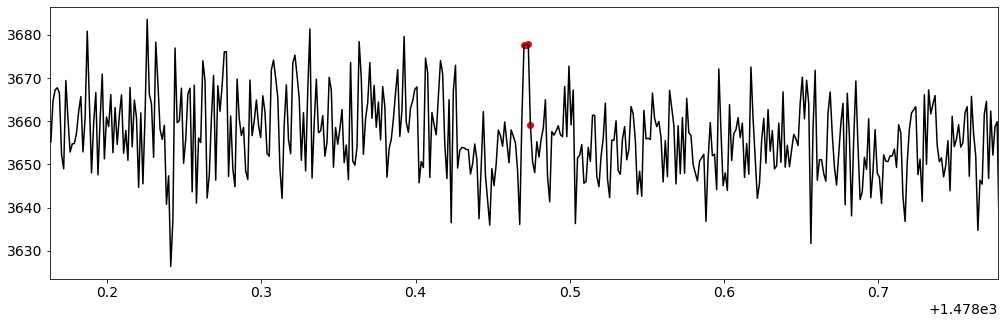

In [220]:
%matplotlib inline
for i, row in sdf.iloc[:].iterrows():
    plt.figure(figsize=(17,5))
    ts, tf = row.tstart, row.tstop
    
    # pick

    if row.mission=="TESS":
        LC = lc[0]
        cad=.65
    else:
        nlc = np.where((ts>tts)[:,0] != (ts>tts)[:,1])[0][0]
        LC = lc[nlc]
        cad = 5.25
    _ = LC[np.where((LC.time>=ts-.2/cad) & (LC.time<=tf+.2/cad))]
    plt.plot(_.time, _.flux, c="k")

    _ = LC[np.where((LC.time>=ts-1e-8) & (LC.time<=tf+1e-8))]
    plt.scatter(_.time, _.flux, c="r")
    plt.xlim(ts-.2/cad, ts+.2/cad)
#     plt.xlabel("time [BTJD - 2457000 days]", fontsize=14)
#     plt.ylabel(r"flux [e$^-$ s$^{-1}$]", fontsize=14)
#     plt.savefig("../results/random/SSO_signature_K2_208_s30.png", dpi=300)

In [181]:
from lightkurve import search_targetpixelfile

In [182]:
tpf = search_targetpixelfile(ID,sector=qcs,mission="TESS").download_all()

7% (1420/19737) of the cadences will be ignored due to the quality mask (quality_bitmask=175).
7% (1420/19737) of the cadences will be ignored due to the quality mask (quality_bitmask=175).


In [183]:
tpf

TargetPixelFileCollection of 1 objects:
	32090583 (1 TessTargetPixelFiles) Sectors: 2

In [184]:
tpf[0].interact(notebook_url='localhost:8889')

INFO:bokeh.server.server:Starting Bokeh server version 2.0.0 (running on Tornado 6.0.4)
INFO:bokeh.server.tornado:User authentication hooks NOT provided (default user enabled)


200 GET /autoload.js?bokeh-autoload-element=25593&bokeh-absolute-url=http://localhost:44427&resources=none (127.0.0.1) 1044.54ms
101 GET /ws (127.0.0.1) 0.74ms
INFO:bokeh.server.views.ws:WebSocket connection opened
INFO:bokeh.server.views.ws:ServerConnection created


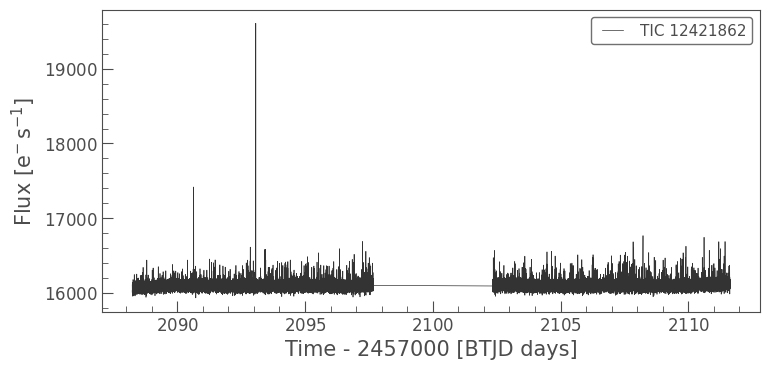

In [124]:
lc[0].plot()
# # # plt.scatter(lc[0].time, lc[0].flux)
# plt.xlim(1323,1323.3)
# plt.ylim(17000,18000);

In [ ]:
2e-3 * 60 * 24

In [ ]:
ff = pd.read_csv("../results/2020_02_flares_vetted.csv")


In [ ]:
_t =1576.37151889061




select = (ff.tstart > _t - 1e-3) & (ff.tstart < _t + 1e-3)

In [ ]:
ff[select].groupby("note").count()

In [ ]:
ff[select].shape

In [ ]:
ff.loc[select, "note"] = "simultaneous FP in multiple Lcs"

In [ ]:
ff.loc[select].groupby("note").count()

In [ ]:
ff.shape

In [ ]:
ff.to_csv("../results/2020_02_flares_vetted.csv", index=False)